## **Lectura 3: Simplex con cotas** 

Conosideremos la versión con restricciones de capacidad del problema de flujo a costo mínimo. 

$$ min \sum_{(i,j) \in A} c_{ij} x_{ij} $$

sujeto a

$$ \sum_{j|(i,j) \in E} x_{ij} - \sum_{j|(j,i) \in E} x_{ji} = b_i \, \forall i \in V $$

$$ l_{ij} \leq x_{ij} \leq u_{ij} \, \forall (i,j) \in A $$


Este problema podría ser abordado de varias maneras: 

-  Agregando variables de holgura para las restricciones de capacidad.
- Haciendo transformaciones a la red para eliminar los $u_{ij}$

Sin embargo, existe una alternativa más eficiente. 

Se puede utilizar una versión ligeramente modificad del método simplex para resolver el problema.

- Las variables no básicas pueden tomar dos valores: el de su cota inferior, o el de su cota superior.
- Cuando se analizan los costos reducidos de $(ij)$ no basico, se deben considerar dos casos 
    - Si $x_{ij} = l_{ij}$, conviene aumentar el flijo en $(ij)$ si $ \pi_i + c_{ij} - \pi_j < 0$.
    - Si $x_{ij} = u_{ij}$, conviene reducir el flijo en $(ij)$ si $ \pi_i + c_{ij} - \pi_j > 0$.
- El paso $\delta$ quedará determinado por la primera variable básica que alcance su cota inferior o superior.


### Ejemplo 1

![image.png](../Images/SIMPLEX_COT.png)

- Observe que tenemos un árbol como solución basica factible.

- Tenemos un arbol no determina totalmente la solución

- Debemos definir si los arcos no básicos son $l_{ij}$ o $u_{ij}$, cuando definimos esto, definimos la solución.


![image.png](../Images/SIMPLEX_COT2.png)

Justo en este momento, se define la solución, esto es calculamos los flujos en los arcos básicos. Así la primera iteración del simplex es:

![image.png](../Images/SIMPLEX_COT3.png)

La segunda iteración del simplex es:

![image.png](../Images/SIMPLEX_COT4.png)

la tercera iteración del simplex es:

![image.png](../Images/SIMPLEX_COT5.png)

### Ejemplo 2
![image.png](../Images/SIMPLEX_COT6.png)

![image.png](../Images/SIMPLEX_COT7.png)

![image.png](../Images/SIMPLEX_COT8.png)

![image.png](../Images/SIMPLEX_COT9.png)

### Observaciones:

1. En el simplex de redes sin cotas, una solución queda definida por un conjunto de variables básicas. En el caso de simplex de redes con cotas, se necesita además conocer el estado $(l_{ij}, u_{ij})$ de cada variable no básica.
2. Una variable puede entrar y volver a salir de la base como resultado de una misma iteración. 
3. Como obtengo una solución inicial? Que podemos hacer ???
4. Como se ve una solución degenerada en este contexto? Se trata de soluciones con variables no básicas en sus cotas.

### Usando networkx para aplicar el método simplex

La librería networkx tiene implementado el método simplex para resolver problemas de flujo de redes. Esta implementación es mucho mas sofisticada que el algoritmo original de SIPLEX para redes. Dentro de nuestra carpeta del bloque de lecturas encontrarás un archivo llamado `networkx_simplex.py` que contiene el código de la implementación de networkx, ademas del paper "Implementacion_networksx_simplex" donde se extraen las principales funciones de la implementación. 

Usarlo es bastante simple, intentemos resolver el problema de flujo de redes que vimos en el ejemplo anterior:

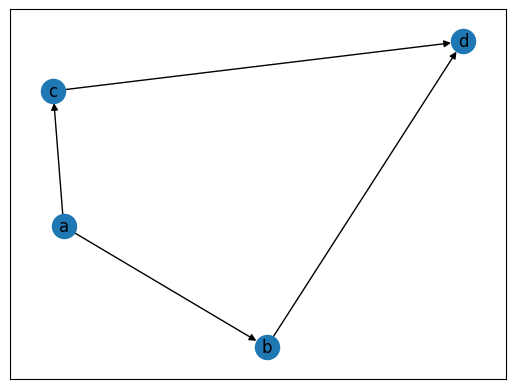

In [1]:
#import
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

G = nx.DiGraph()
G.add_node("a", demand=-5)
G.add_node("d", demand=5)
G.add_edge("a", "b", weight=3, capacity=4)
G.add_edge("a", "c", weight=6, capacity=10)
G.add_edge("b", "d", weight=1, capacity=9)
G.add_edge("c", "d", weight=2, capacity=5)
# graph the network
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


In [2]:
flowCost, flowDict = nx.network_simplex(G)

flowDict

{'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}

In [3]:
flowCost

24